In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import ddm.plot

import paranoid as pns
pns.settings.Settings.set(enabled=False)


from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision
from ddm import Sample
from ddm.models import LossBIC, LossFunction, LossLikelihood, LossSquaredError
from ddm import Fittable
from ddm.functions import fit_adjust_model, display_model


import pandas

from scipy import stats

In [2]:
# импортировали датасет
# создали сэмпл

# NC_Cue EXOGENOUS
with open("/Users/alexeyasvarisch/HSE/MASTER/experiment2/Exp_dot_data/Edited/dt_cut_gr_1_2_NC_Cue.csv", "r") as f:
    NC_Cue = pandas.read_csv(f, sep = ",", dtype = {'rt':np.float64, 'soa':np.float64, 'corrans':np.float64})
    
NC_Cue_sample = Sample.from_pandas_dataframe(NC_Cue, rt_column_name="rt", correct_column_name="corrans")


# NC_noCue
with open("/Users/alexeyasvarisch/HSE/MASTER/experiment2/Exp_dot_data/Edited/dt_cut_gr_1_2_NC_noCue.csv", "r") as f:
    NC_noCue = pandas.read_csv(f, sep = ",", dtype = {'rt':np.float64, 'soa':np.float64, 'corrans':np.float64})    

NC_noCue_sample = Sample.from_pandas_dataframe(NC_noCue, rt_column_name="rt", correct_column_name="corrans")
    
    
# C_Cue
with open("/Users/alexeyasvarisch/HSE/MASTER/experiment2/Exp_dot_data/Edited/dt_cut_gr_1_2_C_Cue.csv", "r") as f:
    C_Cue = pandas.read_csv(f, sep = ",", dtype = {'rt':np.float64, 'soa':np.float64, 'corrans':np.float64})    

C_Cue_sample = Sample.from_pandas_dataframe(C_Cue, rt_column_name="rt", correct_column_name="corrans")
    

# C_noCue ENDOGENOUS
with open("/Users/alexeyasvarisch/HSE/MASTER/experiment2/Exp_dot_data/Edited/dt_cut_gr_1_2_C_noCue.csv", "r") as f:
    C_noCue = pandas.read_csv(f, sep = ",", dtype = {'rt':np.float64, 'soa':np.float64, 'corrans':np.float64})    

C_noCue_sample = Sample.from_pandas_dataframe(C_noCue, rt_column_name="rt", correct_column_name="corrans")    

# 1.1 Took model 1 (fittable) - Baseline (NC_noCue)

In [3]:
# 1.1 Created model №1 (fittable) - Baseline (NC_noCue)
model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=20)),
                  noise=NoiseConstant(noise=Fittable(minval=.5, maxval=4)),
                  #bound=BoundConstant(B=1.1),
                  bound=BoundConstant(B=Fittable(minval=0.1, maxval=8)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.001, dt=.01, T_dur=1.1)

# 2.1 Fit model with Baseline (NC_noCue)


In [4]:
# 2.1 Fitted model №1 with Baseline (NC_noCue)
fit_adjust_model(NC_noCue_sample, model_fit,
                 method="differential_evolution",
                 lossfunction=LossSquaredError)

[18.942608695804275, 2.625580221141441, 3.848301823783553, 0.2735852601964541]
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(0.7442275668900695, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.2193490613232543, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.5463758418700864, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.9032904763054463, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03097982554736629
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(5.628142670699926, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.460883195200525, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.2052832779642904, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.5373202177971574, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03931627098059784
Model(name='Simple model (fitted)', drift=DriftConstant(drift=F

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(1.0931996035888698, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.511033633659341, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(2.8281487714549085, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.5121195066951034, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03100363690932256
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(3.0900498642247864, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.3363446708998628, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(2.2992157094493226, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.4939657311196182, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03571834568807741
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.749232859116647, minval=0, maxval=20)), noise=NoiseConstant(noise=Fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(2.232012273366202, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.29064073930655, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.497145990261697, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.787791335678094, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.030925466037769214
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(19.683339135594004, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.7224909553274435, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.981649505457872, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.891542676548111, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03184800935712411
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(5.720714106133445, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(6.3656394494421695, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.0799013799861625, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.092928558765038, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.5633509253039665, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03100885286039527
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(5.803499914715118, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.7904417244068713, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.464614980666049, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.4500393614521631, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03337297249752745
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(14.299988917838434, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitte

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(19.78652851265402, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.149966786441107, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(7.877208889445461, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.6161058183664432, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.05863435118613635
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.385987770323958, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.8157740959974222, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.790948744433228, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.9848857518322692, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03092546603453086
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(18.03801790287101, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.591601689367955, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.108357664625604, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(1.3629858355413655, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.7767134357586263, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.18441495031880356
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.424710941613903, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.2667208026406904, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.22406135383809, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.5256890933689152, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.06242131157279169
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.801028126315344, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(1.5746151256260283, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.787558250568142, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.605266749043977, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.4218335708048728, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.030925454732463192
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.00286898788203, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.2288890596421411, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(7.628856734218358, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.13801490596867882, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.06421419010253812
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(2.4966412102588276, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitt

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(8.024737814144817, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.560229106629045, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.087020635495895, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.6684595467525142, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03094110164658467
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.051830556311778, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.499684895058789, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.344837990208478, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.3387775123434761, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03909832100221927
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(3.6154013493845527, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.893586154576496, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.256702820524271, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.999868097477258, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.037501933118632425, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.006866687614719935
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(6.172385407688515, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.4314188360247282, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.198778622335577, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.35935654872548756, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.036370415628193216
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(5.7419763514226, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitt

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.48069271945727, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.8195446261357713, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.736126474947978, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.0594347601109948, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.016961979022234282
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.895099690422462, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.2440663960471112, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.780321039582271, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.08303163660582696, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.005576693770165981
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(8.48930791289751, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitt

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.831618868002966, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.7365780727141076, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.870772933831815, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.0591243135094735, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.007792419884586389
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(6.751838646581372, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.0281386389317337, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.886879413120481, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.14247603553485388, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.04807898102498332
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.733439934819312, minval=0, maxval=20)), noise=NoiseConstant(noise=Fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.953913432973657, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.1839165626281876, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.854868583076436, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.09892150946038525, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.02897270338709281
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(13.765520363663262, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.115990579454951, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.739297591178247, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.48451770333102506, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.05092902866536075
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(1.5746151256260283, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitt

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(7.400486453489911, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.0816753154122933, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.304565019022235, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.4406298037036449, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.033589396311897085
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.170470808767995, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.1159017134103655, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.185637594913094, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.9494322932419846, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.030925468689448423
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.076936138625012, minval=0, maxval=20)), noise=NoiseConstant(noise=Fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(14.491593286301628, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(0.7842101026198289, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.360359507651811, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.007338124107504174, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0980791794162449
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.354956638160676, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.3131457386504497, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(2.0198268339904684, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.021923373274588043, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.06143366458063313
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.865186309777133, minval=0, maxval=20)), noise=NoiseConstant(noise=

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(6.479867598240348, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.254391732163594, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.4139424114374775, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.06540960663771633, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.015241268777055087
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.759511707111624, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.6016197941701806, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.1397773579191215, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.22456220824772177, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.039927857041568114
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(18.127442510317493, minval=0, maxval=20)), noise=NoiseConstant(noise=

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.119935756008436, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.9637111205558533, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.8945658062149864, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.04202501871667974, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.010103925303090998
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(1.8218800157341501, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.377880980928022, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(0.6357633268490925, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.004286353334113591, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.07060672755982211
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(14.700840802922993, minval=0, maxval=20)), noise=NoiseConstant(noise

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.625511782020292, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.394225816777773, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.462131353849992, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.10482398980313479, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.02125036015241017
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(18.933108115580595, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.9781045190947912, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(7.6511327828773545, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.11360860135172551, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.011663868886528036
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(5.423142399788034, minval=0, maxval=20)), noise=NoiseConstant(noise=Fi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.238130712269736, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.359935048706059, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.691178056518414, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.06480800322424474, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0043598118363340505
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.564613192544776, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.8085782281010774, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.830988950357885, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.10180033604009459, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.003746323545204218
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(8.500614514893472, minval=0, maxval=20)), noise=NoiseConstant(noise=F

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.011629300043857, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.4640479073199977, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.92265609765428, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.16796830730415352, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0038061989045666757
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(19.490834787996267, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.542337551426333, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(7.665780692548882, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.12051843326211864, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.008955439796266394
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(18.38950068474792, minval=0, maxval=20)), noise=NoiseConstant(noise=Fi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(19.459782521896436, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.313331176416779, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.7565373890252864, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.004059439024750533, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03684675758025841
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(18.771181484209706, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.7018806034873433, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.921678188386858, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.0655789330435187, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0521507685631726
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.931393705058973, minval=0, maxval=20)), noise=NoiseConstant(noise=Fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.239179775315238, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.154760224236712, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.972056194437577, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.03197098653303554, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.017502559035552222
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.988522356756194, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.044745202615131, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.331185059983671, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.04735188042721733, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.004841618028218801
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.10749615760367, minval=0, maxval=20)), noise=NoiseConstant(noise=Fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.040009629539473, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.2147859786386745, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.063260992757999, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.07369316892797118, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.01037875516185888
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(13.738247209069117, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.403855093119335, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.249451447833382, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.08744375328701626, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.003909467664710918
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(15.065062154286714, minval=0, maxval=20)), noise=NoiseConstant(noise=Fi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(15.84206522932355, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.7428201817891313, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.532999446511869, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.0553151985198419, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.00829550215104852
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(19.36126019235237, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.914874679366428, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.779186546820814, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.07632158954108736, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.004988823817497251
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.551920082907113, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitte

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.42485669978999, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.751445085797557, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.069066736670354, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.08071501865151848, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.004349816022275634
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.264352547772576, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.7326238636021132, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.463212034074024, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.04266713316363846, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.007460312105845277
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(14.987209959100866, minval=0, maxval=20)), noise=NoiseConstant(noise=Fi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.450003664112947, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.7470566005246098, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.120453052189151, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.15405047254973192, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.00589020215633122
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.307909370575786, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.2936524740682245, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.729555351944421, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.06660939769338331, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.00453186730542306
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.249119328302626, minval=0, maxval=20)), noise=NoiseConstant(noise=Fi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(15.495506405811618, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.9097978608435495, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(7.501656921141596, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.09500248260993588, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.01173754433482941
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.02986502495331, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.8680252023493864, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(7.237540623598681, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.1040510203316089, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.009832415676905515
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(19.007335837459507, minval=0, maxval=20)), noise=NoiseConstant(noise=Fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(19.869578966275043, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.9097978608435495, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.163687123843799, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.08452835328469088, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.011126113663259114
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(6.737957010624848, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.5383086965800286, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(1.144826488985741, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.21308095385644288, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.018571042441272362
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.73801765865369, minval=0, maxval=20)), noise=NoiseConstant(noise=Fi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.593865506595598, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.2205886160234454, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.258058657077095, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.07987408554148445, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.02333482408050611
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.798374179781522, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.253224345902, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.626170880622623, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.15267830242941915, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0037393816267062194
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.265353615150197, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitt

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.201020785620287, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.5213446579416234, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.0645459595129196, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.11922903603197188, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.013221411968343698
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(14.212383870255369, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.577879478254593, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.678022198244895, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.13154554276760722, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.003824340255248659
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.76780710876098, minval=0, maxval=20)), noise=NoiseConstant(noise=F

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(15.822972406715294, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.1920462574872945, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.655495198259502, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.09079259557453218, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.012736206393904229
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(15.140815621574681, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.719267220981672, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.353689778615271, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.10561056099831029, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0037026262515033417
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(14.299349644174274, minval=0, maxval=20)), noise=NoiseConstant(noise=

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(13.844297425953522, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.983137106541905, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(7.8235132829339005, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.0661641142091931, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.014865557864132172
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.5545327069755, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.2335827129662595, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.245093885077361, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.1283409784481636, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0038137640471321106
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(8.45810473595945, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitte

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(17.265353615150197, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.6864553757691523, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.151805499432236, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.07643799886817926, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.05735688248115021
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(13.120484594073655, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.7084039828984987, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.0372484723540025, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.210075915304841, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.004485962102293019
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.05144027067774, minval=0, maxval=20)), noise=NoiseConstant(noise=Fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.682373943362867, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.6594588225388982, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.524812611264115, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.098291282908616, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.003735022983451465
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.015814366179441, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.184670729423968, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.063400984106065, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.14275087722777335, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.004406115277571315
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.104614795252658, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitt

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(8.348095132590776, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.2832924151416, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(6.4094082611044945, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.090063141705779, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.050264364749696394
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(15.398284425916145, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.5747574285741797, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.979873631981138, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.05596412188408578, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.03646295401274436
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(13.891115546569273, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.939536933773063, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.782015838288306, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(5.470979038638285, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.08889888516127104, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.007483588580789473
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.539880440556379, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.898163617871687, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.0058147902886763, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.13999014271916477, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0061320699546600415
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.895277229415779, minval=0, maxval=20)), noise=NoiseConstant(noise=

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(15.46718584034454, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(3.0996372494524556, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.647216959841707, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.15292239308600586, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.003763436824375394
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(14.577415751175327, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.6337761674871074, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.4197327911579265, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.09032694348441755, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.04423790866766168
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(8.649990432230263, minval=0, maxval=20)), noise=NoiseConstant(noise=Fi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(8.445932464681892, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.0122252601523702, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(2.255278012749584, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.16111216407027584, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.00677597848269913
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.457353599459918, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.846613883113517, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(2.9896677818461543, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.138862219170239, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0038677862529512674
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(4.214661740943939, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitte

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(13.526610916206682, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.3032562544517035, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.267591302235136, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.07624604685647723, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0366039485312567
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(18.08261771061793, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.7680238752796966, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(2.2354375677607106, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.046871866804196305, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.11882349861927044
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(7.595954427053444, minval=0, maxval=20)), noise=NoiseConstant(noise=Fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.229366059351909, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.7497133513910867, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(4.101936373743536, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.1257026608800894, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.005526337544541199
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.079310548031865, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.1638499994164935, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.994730753131692, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.0836304216941618, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.004476748042224511
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.140544052056391, minval=0, maxval=20)), noise=NoiseConstant(noise=Fi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.997156982178259, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(2.548144673509063, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.28089060020189, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.12739507058690402, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.01617918143284122
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.037484530774211, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.9778853799123628, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.7314194395136058, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.11575235026224001, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0037052393915327814
differential_evolution step 39: f(x)= 0.00368921
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.85416633476633, mi

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(7.829953946442604, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.5804899864203528, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(2.1847008992521353, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.15252696311120928, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0050670071698700435
differential_evolution step 41: f(x)= 0.00368921
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.357472894404657, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.9787371737929433, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.985439459066662, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.10211661819605516, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0036962077216865803
Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.619538138773912

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.167863787484018, minval=0, maxval=20)), noise=NoiseConstant(noise=Fitted(1.8679106080490926, minval=0.5, maxval=4)), bound=BoundConstant(B=Fitted(3.3780064935396, minval=0.1, maxval=8)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.12244433154010081, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=1.1)

# 3.1 Extract parameteres of fitted model 1 (list) + plot

[Fitted(10.167863787484018, minval=0, maxval=20), Fitted(1.8679106080490926, minval=0.5, maxval=4), Fitted(3.3780064935396, minval=0.1, maxval=8), Fitted(0.12244433154010081, minval=0, maxval=1)]


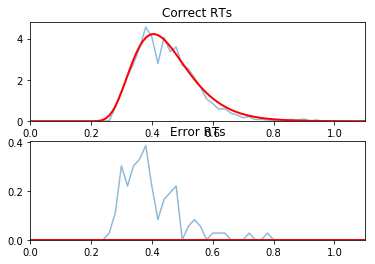

In [5]:
# 3.1 Extract parameteres of fitted model №1 and plot
param_list = model_fit.get_model_parameters()
print(param_list)

ddm.plot.plot_fit_diagnostics(model=model_fit, sample=NC_noCue_sample, data_dt = 0.02)
plt.show()


# 4.1 Made 3 out of 4 parameters constant

In [6]:
# 4.1 Сделали 3 из 4 параметров constant
saved_noise = float(param_list[1])
print(saved_noise)

saved_bound = float(param_list[2])
print(saved_bound)

saved_nonDec = float(param_list[3])
print(saved_nonDec)

1.8679106080490926
3.3780064935396
0.12244433154010081


# KS TEST - fit initial model to baseline (NC_noCue) condition 

0.07511017833486655 8.316381805428819e-09


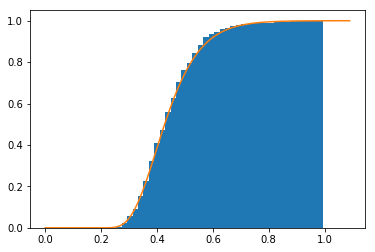

In [7]:
sol = model_fit.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени


class ModelCdfCallable:
    def __init__(self, corr, xmin, xmax):
#         (xmax-xmin)/corr.shape[0] * np.sum(sol.corr) = C (из записей)
#         self.corr = corr / ((xmax-xmin)/corr.shape[0] * np.sum(corr))
        self.corr = np.cumsum(corr)
        self.xmin = xmin
        self.xmax = xmax

        
    def test_corr(self, x, *args):
        result = np.zeros_like(x)
        idx = self.corr.shape[0]*(x-self.xmin)/(self.xmax-self.xmin)
        idx[idx < 0] = 0
        idx[idx >= self.corr.shape[0]] = -1
        

        intidx = np.around(idx).astype(int)
        alpha = idx - intidx
        result = self.corr[intidx] * (1-alpha) + alpha * self.corr[intidx]
#         result[x < self.xmin] = 0
#         result[x > self.xmax] = 0
        return result
#             return self.corr[0]
#         elif x > self.xmax:
#             return self.corr[-1]
#         else:
        
# corr2 = sol.corr  / ((1.1-0)/sol.corr.shape[0] * np.sum(sol.corr))
model_fit_callable = ModelCdfCallable(sol.corr, 0, 1.1)


plt.hist(NC_noCue_sample.subset().corr, bins=40, density=True, cumulative=True)

plt.plot(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False), model_fit_callable.test_corr(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False)))
# stats.kstest(NC_Cue_sample.subset().corr, model_fit_callable.test_corr)
stat, p = stats.kstest(NC_noCue_sample.subset().corr, model_fit_callable.test_corr)
# stat, p = stats.kstest(rand_sample, model_fit_callable.test_corr)
print(stat, p)


# сейчас берем модель зафиченную на baseline condition и оставляя все параметры такими же, фитим ее к сэмплу Ex --> получается точно такой же фит (даже лучше), чем если брать модель с измен. дрифтом и фитить ее к Ex sample. 

0.07641626827891213 5.036218331255782e-09


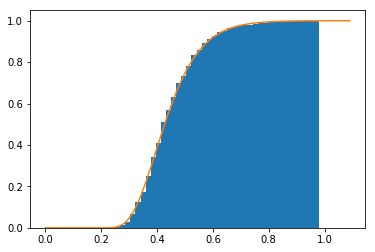

In [8]:
sol = model_fit.solve() 


class ModelCdfCallable:
    def __init__(self, corr, xmin, xmax):
#         (xmax-xmin)/corr.shape[0] * np.sum(sol.corr) = C (из записей)
#         self.corr = corr / ((xmax-xmin)/corr.shape[0] * np.sum(corr))
        self.corr = np.cumsum(corr)
        self.xmin = xmin
        self.xmax = xmax
#         print("Self.corr")
#         print(self.corr)
        
    def test_corr(self, x, *args):
        result = np.zeros_like(x)
        idx = self.corr.shape[0]*(x-self.xmin)/(self.xmax-self.xmin)
        idx[idx < 0] = 0
        idx[idx >= self.corr.shape[0]] = -1
        
#         print(self.corr.shape[0])
#         print(x)
#         print(self.xmax)
#         print(self.xmin)
#         print(idx)
#         print(np.around(idx))
#         print(np.around(idx).astype(int))
        intidx = np.around(idx).astype(int)
        alpha = idx - intidx
        result = self.corr[intidx] * (1-alpha) + alpha * self.corr[intidx]
#         result[x < self.xmin] = 0
#         result[x > self.xmax] = 0
        return result
#             return self.corr[0]
#         elif x > self.xmax:
#             return self.corr[-1]
#         else:
        
# corr2 = sol.corr  / ((1.1-0)/sol.corr.shape[0] * np.sum(sol.corr))
model_fit_callable = ModelCdfCallable(sol.corr, 0, 1.1)


plt.hist(NC_Cue_sample.subset().corr, bins=40, density=True, cumulative=True)

plt.plot(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False), model_fit_callable.test_corr(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False)))
# stats.kstest(NC_Cue_sample.subset().corr, model_fit_callable.test_corr)
stat, p = stats.kstest(NC_Cue_sample.subset().corr, model_fit_callable.test_corr)
print(stat, p)


# plot how baseline model (without any change) fits End sample

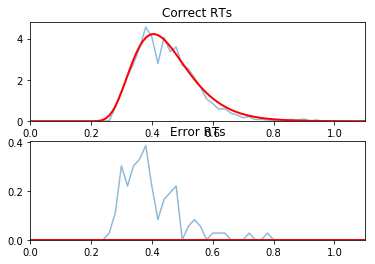

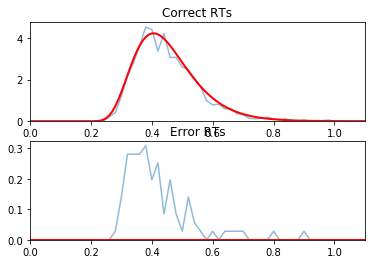

In [9]:
ddm.plot.plot_fit_diagnostics(model=model_fit, sample=NC_noCue_sample,data_dt = 0.02)
plt.show()

ddm.plot.plot_fit_diagnostics(model=model_fit, sample=NC_Cue_sample,data_dt = 0.02)
plt.show()

# сейчас берем модель зафиченную на baseline condition и оставляя все параметры такими же, фитим ее к сэмплу End --> получается, что просто беря модель зафиченную на baseline и не меняя никакие параметры, и сравнивая ее с End sample, мы получаем очень плохой фит

0.17147998617607707 3.953052486509962e-76


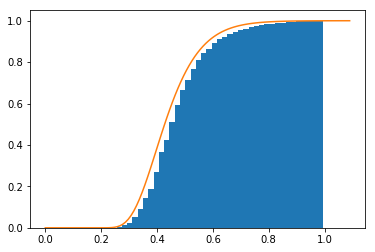

In [10]:
sol = model_fit.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени
# print(sol.cdf_corr(), NC_Cue_sample.subset().corr) # выделили из сэмпла только правильные ответы
# print(sol.cdf_err(), NC_Cue_sample.subset().err) # выделили из сэмпла только НЕправильные ответы
# print(sol.corr)
# print(np.sum(sol.corr))
stats.ks_2samp(sol.corr,NC_noCue_sample.subset().corr)
# plt.plot(sol.corr)

class ModelCdfCallable:
    def __init__(self, corr, xmin, xmax):
#         (xmax-xmin)/corr.shape[0] * np.sum(sol.corr) = C (из записей)
#         self.corr = corr / ((xmax-xmin)/corr.shape[0] * np.sum(corr))
        self.corr = np.cumsum(corr)
        self.xmin = xmin
        self.xmax = xmax
#         print("Self.corr")
#         print(self.corr)
        
    def test_corr(self, x, *args):
        result = np.zeros_like(x)
        idx = self.corr.shape[0]*(x-self.xmin)/(self.xmax-self.xmin)
        idx[idx < 0] = 0
        idx[idx >= self.corr.shape[0]] = -1
        
#         print(self.corr.shape[0])
#         print(x)
#         print(self.xmax)
#         print(self.xmin)
#         print(idx)
#         print(np.around(idx))
#         print(np.around(idx).astype(int))
        intidx = np.around(idx).astype(int)
        alpha = idx - intidx
        result = self.corr[intidx] * (1-alpha) + alpha * self.corr[intidx]
#         result[x < self.xmin] = 0
#         result[x > self.xmax] = 0
        return result
#             return self.corr[0]
#         elif x > self.xmax:
#             return self.corr[-1]
#         else:
        
# corr2 = sol.corr  / ((1.1-0)/sol.corr.shape[0] * np.sum(sol.corr))
model_fit_callable = ModelCdfCallable(sol.corr, 0, 1.1)
# plt.plot(np.linspace(0, 1.1, sol.corr.shape[0]), sol.corr)
# rand_sample = np.random.choice(NC_Cue_sample.subset().corr, 1500, replace=False)
# rand_sample2 = np.random.choice(NC_Cue_sample.subset().corr, 200, replace=False)

plt.hist(C_noCue_sample.subset().corr, bins=40, density=True, cumulative=True)
# plt.hist(rand_sample, bins=40, density=True, cumulative=False)
# plt.hist(rand_sample2, bins=40, density=True, cumulative=False)
# plt.plot(np.linspace(0, 1.1, sol.corr.shape[0]), corr2)
plt.plot(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False), model_fit_callable.test_corr(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False)))
# stats.kstest(NC_Cue_sample.subset().corr, model_fit_callable.test_corr)
stat, p = stats.kstest(C_noCue_sample.subset().corr, model_fit_callable.test_corr)
# stat, p = stats.kstest(rand_sample, model_fit_callable.test_corr)
print(stat, p)
# stat, p = stats.ks_2samp(rand_sample, rand_sample2)
# print(stat, p)

# print(rand_sample)
# plt.hist(rand_sample, density=True)
# model_fit_callable(np.array(0))
# model_fit_callable.test_corr(np.array([-0.1, 0,  0.5, 0.6, 1, 1.1, 1.05, 1.12]))
# model_fit_callable(1.1)
# model_fit_callable(-1)
# model_fit_callable(2)

# 5.1 Do NEW model, where constant parameters and one fittable parameter of previous model work as input parameters 

In [11]:
model_fit_to_Ex = Model(name='New Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=20)),
                  noise=NoiseConstant(noise=saved_noise),
                  bound=BoundConstant(B=saved_bound),
                  overlay=OverlayNonDecision(nondectime=saved_nonDec),
                  dx=.001, dt=.01, T_dur=1.1)

display_model(model_fit_to_Ex)

Model New Simple model (fitted) information:
Drift component DriftConstant:
    constant
    Fittable parameters:
    - drift: Fittable (default 4.393520)
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.867911
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 3.378006
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.122444



In [12]:
model_fit_to_End = Model(name='New Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=20)),
                  noise=NoiseConstant(noise=saved_noise),
                  bound=BoundConstant(B=saved_bound),
                  overlay=OverlayNonDecision(nondectime=saved_nonDec),
                  dx=.001, dt=.01, T_dur=1.1)

display_model(model_fit_to_End)

Model New Simple model (fitted) information:
Drift component DriftConstant:
    constant
    Fittable parameters:
    - drift: Fittable (default 7.146207)
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.867911
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 3.378006
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.122444



In [13]:
model_fit_to_Full = Model(name='New Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=20)),
                  noise=NoiseConstant(noise=saved_noise),
                  bound=BoundConstant(B=saved_bound),
                  overlay=OverlayNonDecision(nondectime=saved_nonDec),
                  dx=.001, dt=.01, T_dur=1.1)

display_model(model_fit_to_Full)

Model New Simple model (fitted) information:
Drift component DriftConstant:
    constant
    Fittable parameters:
    - drift: Fittable (default 12.154323)
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.867911
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 3.378006
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.122444



# 6.1 Fit NEW model to the Exogenous sample (NC_Cue)

In [14]:
fit_adjust_model(NC_Cue_sample, model_fit_to_Ex,
                 method="differential_evolution",
                 lossfunction=LossSquaredError)

[10.218951625038194]
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(15.113325506516942, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0337625355676327
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.077390429478477, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.005185042299102968
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(18.3222029060614, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0

Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.197538160519438, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.00416079263542446
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.576102201413514, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.004685175683936454
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.533726055441218, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_du

Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.222378462680597, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1)

# 6.2 Fit NEW model to the Endogenous sample (C_noCue)

In [15]:
fit_adjust_model(C_noCue_sample, model_fit_to_End,
                 method="differential_evolution",
                 lossfunction=LossSquaredError)

[14.631198778782409]
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(16.786396865581576, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.06111829909607832
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(2.2911188828957476, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.02672835743413832
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(5.429481537065284, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=

Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.302801275202192, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.003551833530040114
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.245587617295953, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.003571432610961784
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.330659669634223, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur

Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.403736683322958, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1)

# 6.3 Fit NEW model to the Full sample (C_Cue)


In [16]:
fit_adjust_model(C_Cue_sample, model_fit_to_Full,
                 method="differential_evolution",
                 lossfunction=LossSquaredError)

[6.975133459937881]
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(14.92418357469941, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.04362323204369098
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(12.098236948972982, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.015671643168636604
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(4.499384082122749, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0

Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(10.584876448727796, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.006466291953017961
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(11.177365079907114, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.009353042155818503
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(7.5557294597091795, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_

Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.260518758995145, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.0038220802427767907
Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.260518768995146, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1) loss=0.003822080242495879
Params [9.26051876] gave 0.0038220802427767907


Model(name='New Simple model (fitted)', drift=DriftConstant(drift=Fitted(9.260518758995145, minval=0, maxval=20)), noise=NoiseConstant(noise=1.8679106080490926), bound=BoundConstant(B=3.3780064935396), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=0.12244433154010081), dx=0.001, dt=0.01, T_dur=1.1)

# 7.1 Plot how model 1 fits the baseline sample (NC_noCue) and how "model_fit_to_Ex" model fits the Exogenous sample (NC_Cue) by changing only one parameter (drift rate)

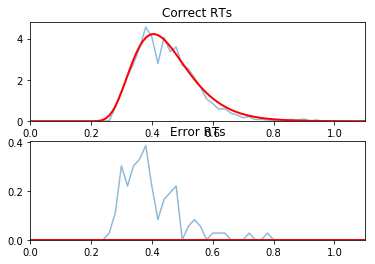

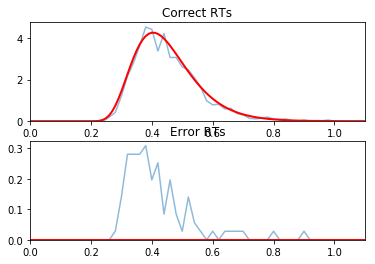

Model New Simple model (fitted) information:
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 10.222378
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.867911
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 3.378006
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.122444



In [17]:
ddm.plot.plot_fit_diagnostics(model=model_fit, sample=NC_noCue_sample,data_dt = 0.02)
plt.show()

ddm.plot.plot_fit_diagnostics(model=model_fit_to_Ex, sample=NC_Cue_sample,data_dt = 0.02)
plt.show()

display_model(model_fit_to_Ex)

# 7.2 Plot how model 1 fits the baseline sample (NC_noCue) and how model "model_fit_to_End" fits the Endogenous sample (C_noCue) by changing only one parameter (drift rate)

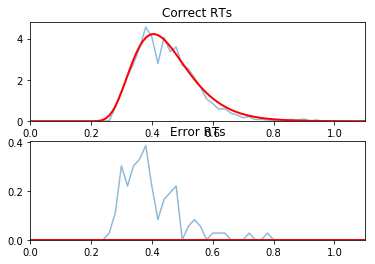

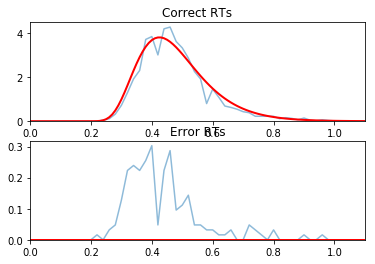

Model New Simple model (fitted) information:
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 9.403737
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.867911
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 3.378006
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.122444



In [18]:
ddm.plot.plot_fit_diagnostics(model=model_fit, sample=NC_noCue_sample,data_dt = 0.02)
plt.show()

ddm.plot.plot_fit_diagnostics(model=model_fit_to_End, sample=C_noCue_sample,data_dt = 0.02)
plt.show()

display_model(model_fit_to_End)

# 7.3 Plot how model 1 fits the baseline sample (NC_noCue) and how model "model_fit_to_Full" fits the Full sample (C_Cue) by changing only one parameter (drift rate)

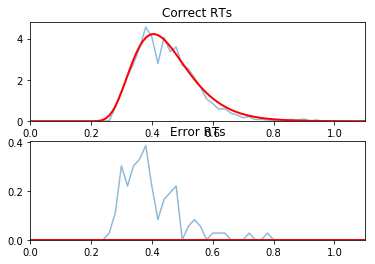

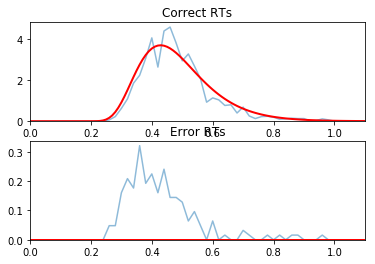

Model New Simple model (fitted) information:
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 9.260519
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.867911
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 3.378006
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.122444



In [19]:
ddm.plot.plot_fit_diagnostics(model=model_fit, sample=NC_noCue_sample,data_dt = 0.02)
plt.show()

ddm.plot.plot_fit_diagnostics(model=model_fit_to_Full, sample=C_Cue_sample,data_dt = 0.02)
plt.show()

display_model(model_fit_to_Full)

# фитим модель к Exogenous sample и получаем, что через drift rate можно пепейти от baseline sample к Ex sample

0.08190628029095515 2.6421331789094893e-10


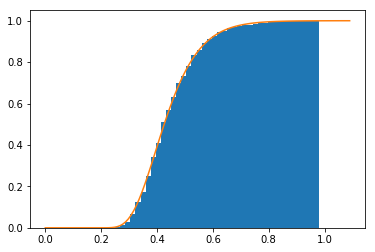

In [20]:
sol_Ex = model_fit_to_Ex.solve()# print(sol.cdf_corr(), NC_Cue_sample.subset().corr) # выделили из сэмпла только правильные ответы

class ModelCdfCallable:
    def __init__(self, corr, xmin, xmax):
#         (xmax-xmin)/corr.shape[0] * np.sum(sol.corr) = C (из записей)
#         self.corr = corr / ((xmax-xmin)/corr.shape[0] * np.sum(corr))
        self.corr = np.cumsum(corr)
        self.xmin = xmin
        self.xmax = xmax

        
    def test_corr(self, x, *args):
        result = np.zeros_like(x)
        idx = self.corr.shape[0]*(x-self.xmin)/(self.xmax-self.xmin)
        idx[idx < 0] = 0
        idx[idx >= self.corr.shape[0]] = -1
        

        intidx = np.around(idx).astype(int)
        alpha = idx - intidx
        result = self.corr[intidx] * (1-alpha) + alpha * self.corr[intidx]
#         result[x < self.xmin] = 0
#         result[x > self.xmax] = 0
        return result
#             return self.corr[0]
#         elif x > self.xmax:
#             return self.corr[-1]
#         else:
        
# corr2 = sol.corr  / ((1.1-0)/sol.corr.shape[0] * np.sum(sol.corr))
model_fit_callable = ModelCdfCallable(sol_Ex.corr, 0, 1.1)


plt.hist(NC_Cue_sample.subset().corr, bins=40, density=True, cumulative=True)

plt.plot(np.linspace(0, 1.1, sol_Ex.corr.shape[0], endpoint=False), model_fit_callable.test_corr(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False)))
# stats.kstest(NC_Cue_sample.subset().corr, model_fit_callable.test_corr)
stat, p = stats.kstest(NC_Cue_sample.subset().corr, model_fit_callable.test_corr)
# stat, p = stats.kstest(rand_sample, model_fit_callable.test_corr)
print(stat, p)
# stat, p = stats.ks_2samp(rand_sample, rand_sample2)
# print(stat, p)

# print(rand_sample)
# plt.hist(rand_sample, density=True)
# model_fit_callable(np.array(0))
# model_fit_callable.test_corr(np.array([-0.1, 0,  0.5, 0.6, 1, 1.1, 1.05, 1.12]))
# model_fit_callable(1.1)
# model_fit_callable(-1)
# model_fit_callable(2)

0.09077155163336104 1.2260882145357072e-21


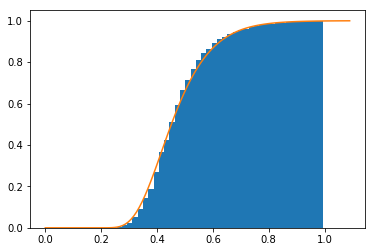

In [21]:
sol_End = model_fit_to_End.solve()# print(sol.cdf_corr(), NC_Cue_sample.subset().corr) # выделили из сэмпла только правильные ответы

stats.ks_2samp(sol_End.corr,C_noCue_sample.subset().corr)

class ModelCdfCallable:
    def __init__(self, corr, xmin, xmax):
#         (xmax-xmin)/corr.shape[0] * np.sum(sol.corr) = C (из записей)
#         self.corr = corr / ((xmax-xmin)/corr.shape[0] * np.sum(corr))
        self.corr = np.cumsum(corr)
        self.xmin = xmin
        self.xmax = xmax

        
    def test_corr(self, x, *args):
        result = np.zeros_like(x)
        idx = self.corr.shape[0]*(x-self.xmin)/(self.xmax-self.xmin)
        idx[idx < 0] = 0
        idx[idx >= self.corr.shape[0]] = -1
        

        intidx = np.around(idx).astype(int)
        alpha = idx - intidx
        result = self.corr[intidx] * (1-alpha) + alpha * self.corr[intidx]
#         result[x < self.xmin] = 0
#         result[x > self.xmax] = 0
        return result
#             return self.corr[0]
#         elif x > self.xmax:
#             return self.corr[-1]
#         else:
        
# corr2 = sol.corr  / ((1.1-0)/sol.corr.shape[0] * np.sum(sol.corr))
model_fit_callable = ModelCdfCallable(sol_End.corr, 0, 1.1)


plt.hist(C_noCue_sample.subset().corr, bins=40, density=True, cumulative=True)

plt.plot(np.linspace(0, 1.1, sol_End.corr.shape[0], endpoint=False), model_fit_callable.test_corr(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False)))
# stats.kstest(NC_Cue_sample.subset().corr, model_fit_callable.test_corr)
stat, p = stats.kstest(C_noCue_sample.subset().corr, model_fit_callable.test_corr)
# stat, p = stats.kstest(rand_sample, model_fit_callable.test_corr)
print(stat, p)
# stat, p = stats.ks_2samp(rand_sample, rand_sample2)
# print(stat, p)

# print(rand_sample)
# plt.hist(rand_sample, density=True)
# model_fit_callable(np.array(0))
# model_fit_callable.test_corr(np.array([-0.1, 0,  0.5, 0.6, 1, 1.1, 1.05, 1.12]))
# model_fit_callable(1.1)
# model_fit_callable(-1)
# model_fit_callable(2)

0.09226188355870751 2.788675448639321e-22


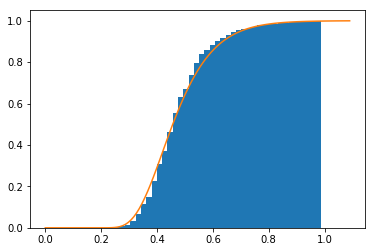

In [22]:
sol_Full = model_fit_to_Full.solve()# print(sol.cdf_corr(), NC_Cue_sample.subset().corr) # выделили из сэмпла только правильные ответы

class ModelCdfCallable:
    def __init__(self, corr, xmin, xmax):
#         (xmax-xmin)/corr.shape[0] * np.sum(sol.corr) = C (из записей)
#         self.corr = corr / ((xmax-xmin)/corr.shape[0] * np.sum(corr))
        self.corr = np.cumsum(corr)
        self.xmin = xmin
        self.xmax = xmax

        
    def test_corr(self, x, *args):
        result = np.zeros_like(x)
        idx = self.corr.shape[0]*(x-self.xmin)/(self.xmax-self.xmin)
        idx[idx < 0] = 0
        idx[idx >= self.corr.shape[0]] = -1
        

        intidx = np.around(idx).astype(int)
        alpha = idx - intidx
        result = self.corr[intidx] * (1-alpha) + alpha * self.corr[intidx]
#         result[x < self.xmin] = 0
#         result[x > self.xmax] = 0
        return result
#             return self.corr[0]
#         elif x > self.xmax:
#             return self.corr[-1]
#         else:
        
# corr2 = sol.corr  / ((1.1-0)/sol.corr.shape[0] * np.sum(sol.corr))
model_fit_callable = ModelCdfCallable(sol_Full.corr, 0, 1.1)


plt.hist(C_Cue_sample.subset().corr, bins=40, density=True, cumulative=True)

plt.plot(np.linspace(0, 1.1, sol_Full.corr.shape[0], endpoint=False), model_fit_callable.test_corr(np.linspace(0, 1.1, sol.corr.shape[0], endpoint=False)))
# stats.kstest(NC_Cue_sample.subset().corr, model_fit_callable.test_corr)
stat, p = stats.kstest(C_Cue_sample.subset().corr, model_fit_callable.test_corr)
# stat, p = stats.kstest(rand_sample, model_fit_callable.test_corr)
print(stat, p)
# stat, p = stats.ks_2samp(rand_sample, rand_sample2)
# print(stat, p)

# print(rand_sample)
# plt.hist(rand_sample, density=True)
# model_fit_callable(np.array(0))
# model_fit_callable.test_corr(np.array([-0.1, 0,  0.5, 0.6, 1, 1.1, 1.05, 1.12]))
# model_fit_callable(1.1)
# model_fit_callable(-1)
# model_fit_callable(2)

# 8.1 Draw NC_noCue (baseline) distr. and model fit distr. and compare them with KS-test

Ks_2sampResult(statistic=0.5662800331400165, pvalue=9.372146935756317e-15)

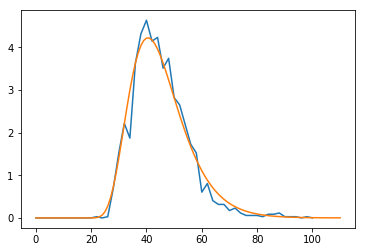

In [23]:

sol = model_fit.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени
#print(sol.cdf_corr(), NC_noCue_sample.subset().corr) # выделили из сэмпла только правильные ответы
#print(sol.cdf_err(), NC_noCue_sample.subset().err) # выделили из сэмпла только НЕправильные ответы

large_sample = sol.resample(k=200000, seed=0).subset().corr
small_sample = np.histogram(large_sample, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

#bins=800)

data_hist_top = np.histogram(NC_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

plt.plot(range(0,101,2),data_hist_top)   # данные
plt.plot(sol.pdf_corr()) # модель

stats.ks_2samp(NC_noCue_sample.subset().corr, small_sample)
               
#sol.resample(k=800, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных


# 8.2 Draw NC_Cue (Ex) distr. and model fit distr. and compare them with KS-test

In [ ]:
sol_Ex = model_fit_to_Ex.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени
#print(sol.cdf_corr(), NC_Cue_sample.subset().corr) # выделили из сэмпла только правильные ответы
#print(sol.cdf_err(), NC_Cue_sample.subset().err) # выделили из сэмпла только НЕправильные ответы

large_sample2 = sol_Ex.resample(k=200000, seed=0).subset().corr
small_sample2 = np.histogram(large_sample2, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

data_hist_to_Ex = np.histogram(NC_Cue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

plt.plot(range(0,101,2),data_hist_to_Ex)   # данные
plt.plot(sol_Ex.pdf_corr()) # модель

stats.ks_2samp(NC_Cue_sample.subset().corr,small_sample2) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных


# 8.3 Draw C_noCue (End) distr. and model fit distr. and compare them with KS-test

In [ ]:
sol_End = model_fit_to_End.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени
#print(sol_End.cdf_corr(), C_noCue_sample.subset().corr) # выделили из сэмпла только правильные ответы
#print(sol_End.cdf_err(), C_noCue_sample.subset().err) # выделили из сэмпла только НЕправильные ответы

data_hist_to_End = np.histogram(C_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

plt.plot(range(0,101,2),data_hist_to_End)   # данные
plt.plot(sol_End.pdf_corr()) # модель

stats.ks_2samp(C_noCue_sample.subset().corr,sol_End.resample(k=200, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных


#####################################################################################################################

GUI

In [ ]:
ddm.plot.model_gui(model=model_fit, sample=NC_noCue_sample)

#####################################################################################################################

# Comparison of SAMPLEs with each other using KS-test

### NC_Cue VS NC_noCue - do not differ

In [ ]:
data_hist_top_NC_Cue = np.histogram(NC_Cue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_top_NC_Cue)  


data_hist_bottom_NC_noCue = np.histogram(NC_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_bottom_NC_noCue)

stats.ks_2samp(NC_Cue_sample.subset().corr,NC_noCue_sample.subset().corr)

### C_Cue VS C_noCue - do not differ

In [ ]:
data_hist_top_C_Cue = np.histogram(C_Cue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_top_C_Cue)  


data_hist_bottom_C_noCue = np.histogram(C_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_bottom_C_noCue) 

stats.ks_2samp(C_Cue_sample.subset().corr,C_noCue_sample.subset().corr)

### NC_Cue VS C_noCue   (Ex vs End) ---- differ

In [ ]:
data_hist_blue_NC_Cue = np.histogram(NC_Cue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_blue_NC_Cue)  


data_hist_orange_C_noCue = np.histogram(C_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_orange_C_noCue) 

stats.ks_2samp(NC_Cue_sample.subset().corr,C_noCue_sample.subset().corr)

### NC_Cue VS C_Cue ---- Differ

In [ ]:
data_hist_blue_NC_Cue = np.histogram(NC_Cue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_blue_NC_Cue)  


data_hist_orange_C_Cue = np.histogram(C_Cue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_orange_C_Cue) 

stats.ks_2samp(NC_Cue_sample.subset().corr,C_Cue_sample.subset().corr)

### NC_noCue VS C_noCue ---- Differ

In [ ]:
data_hist_blue_NC_noCue = np.histogram(NC_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_blue_NC_noCue)  


data_hist_orange_C_noCue = np.histogram(C_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 2+0.04/2),density=True)[0]

plt.plot(range(0,201,4),data_hist_orange_C_noCue) 

stats.ks_2samp(NC_noCue_sample.subset().corr,C_noCue_sample.subset().corr)

# Apply "model_fit_new" that was initially fitted to NC_Cue with only fittable DRIFT to other 3 conditions (Samples)

### Fit "model_fit_new" to C_noCue

In [ ]:
model_fit_new_to_C_noCue = Model(name='New Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=20)),
                  noise=NoiseConstant(noise=saved_noise),
                  bound=BoundConstant(B=saved_bound),
                  overlay=OverlayNonDecision(nondectime=saved_nonDec),
                  dx=.001, dt=.01, T_dur=1.1)

display_model(model_fit_new_to_C_noCue)

In [ ]:
fit_adjust_model(C_noCue_sample, model_fit_new_to_C_noCue,
                 method="differential_evolution",
                 lossfunction=LossSquaredError)

### Fit "model_fit_new" to C_Cue

In [ ]:
model_fit_new_to_C_Cue = Model(name='New Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=20)),
                  noise=NoiseConstant(noise=saved_noise),
                  bound=BoundConstant(B=saved_bound),
                  overlay=OverlayNonDecision(nondectime=saved_nonDec),
                  dx=.001, dt=.01, T_dur=1.1)

display_model(model_fit_new_to_C_Cue)

In [ ]:
fit_adjust_model(C_Cue_sample, model_fit_new_to_C_Cue,
                 method="differential_evolution",
                 lossfunction=LossSquaredError)

# Plot how "model_fit" fits initial sample NC_noCue and how "model_fit_new" fits other conditions by only changing DRIFT RATE

In [ ]:
print("NC_noCue")
ddm.plot.plot_fit_diagnostics(model=model_fit, sample=NC_noCue_sample,data_dt = 0.02)
plt.show()

print("NC_Cue - Ex")
ddm.plot.plot_fit_diagnostics(model=model_fit_to_Ex, sample=NC_Cue_sample,data_dt = 0.02)
plt.show()

print("C_noCue - End")
ddm.plot.plot_fit_diagnostics(model=model_fit_to_End, sample=C_noCue_sample,data_dt = 0.02)
plt.show()


# Display NC_Cue human distr and model fit + KS test

In [ ]:
sol = model_fit.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени
#print(sol.cdf_corr(), NC_Cue_sample.subset().corr) # выделили из сэмпла только правильные ответы
#print(sol.cdf_err(), NC_Cue_sample.subset().err) # выделили из сэмпла только НЕправильные ответы

data_hist_1 = np.histogram(NC_Cue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

plt.plot(range(0,101,2),data_hist_1) # данные
plt.plot(sol.pdf_corr()) # модель
stats.ks_2samp(NC_Cue_sample.subset().corr,sol.resample(k=200, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных


# Display NC_noCue human distr and model fit + KS test

In [ ]:
sol_new = model_fit_new.solve()

data_hist_2 = np.histogram(NC_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

plt.plot(range(0,101,2),data_hist_2)   # данные
plt.plot(sol_new.pdf_corr()) # модель
stats.ks_2samp(NC_noCue_sample.subset().corr,sol_new.resample(k=200, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных


# Display C_noCue human distr and model fit + KS test

In [ ]:
sol_new_to_C_noCue = model_fit_new_to_C_noCue.solve()

data_hist_3 = np.histogram(C_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

plt.plot(range(0,101,2),data_hist_3)   # данные
plt.plot(sol_new_to_C_noCue.pdf_corr()) # модель
stats.ks_2samp(C_noCue_sample.subset().corr,sol_new_to_C_noCue.resample(k=200, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных



# Display C_Cue human distr and model fit + KS test

In [ ]:
sol_new_to_C_Cue = model_fit_new_to_C_Cue.solve()

data_hist_4 = np.histogram(C_Cue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

plt.plot(range(0,101,2),data_hist_4)   # данные
plt.plot(sol_new_to_C_Cue.pdf_corr()) # модель
stats.ks_2samp(C_Cue_sample.subset().corr,sol_new_to_C_Cue.resample(k=200, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных


In [ ]:
plt.hist(sol_new_to_C_Cue.resample(k=200, seed=0).subset().corr, bins = 40)

In [ ]:
large_sample = sol.resample(k=200000, seed=0).subset().corr
plt.hist(large_sample, bins=800)


In [ ]:

sol = model_fit.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени
#print(sol.cdf_corr(), NC_noCue_sample.subset().corr) # выделили из сэмпла только правильные ответы
#print(sol.cdf_err(), NC_noCue_sample.subset().err) # выделили из сэмпла только НЕправильные ответы

large_sample = sol.resample(k=200000, seed=0).subset().corr
small_sample = np.histogram(large_sample, bins = 1704)

data_hist_top = np.histogram(NC_noCue_sample.subset().corr, bins = 1704)
plt.plot(range(0,101,2),data_hist_top)   # данные
plt.plot(sol.pdf_corr()) # модель

stats.ks_2samp(NC_noCue_sample.subset().corr, small_sample)
               
#sol.resample(k=800, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных


In [ ]:
print(len(NC_noCue_sample.subset().corr))

In [ ]:

sol = model_fit.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени
#print(sol.cdf_corr(), NC_noCue_sample.subset().corr) # выделили из сэмпла только правильные ответы
#print(sol.cdf_err(), NC_noCue_sample.subset().err) # выделили из сэмпла только НЕправильные ответы

large_sample = sol.resample(k=200000, seed=0).subset().corr
small_sample = np.histogram(large_sample, bins=1704)

#bins=800)

data_hist_top = np.histogram(NC_noCue_sample.corr, bins=1704)[0]
print(data_hist_top)
plt.plot(data_hist_top)   # данные
plt.plot(sol.pdf_corr()) # модель

stats.ks_2samp(NC_noCue_sample.corr, small_sample)
               
#sol.resample(k=800, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных


In [ ]:
print(len(NC_noCue_sample.corr))


In [ ]:
print(len(NC_noCue_sample.corr))


In [ ]:
data_hist_top = np.histogram(NC_noCue_sample.corr)
plt.hist(data_hist_top)   # данные


In [ ]:
sol.сdf.corr(NC_noCue_sample, dt=.01, T_dur=2)

In [ ]:
data_hist_top = np.histogram(NC_noCue_sample.corr, bins=1704)
plt.plot(data_hist_top)   # данные


In [ ]:

sol = model_fit.solve() # из параметров модели получили возможность счиатать функцию распределения в любой точке в любой момент времени
#print(sol.cdf_corr(), NC_noCue_sample.subset().corr) # выделили из сэмпла только правильные ответы
#print(sol.cdf_err(), NC_noCue_sample.subset().err) # выделили из сэмпла только НЕправильные ответы


large_sample = sol.resample(k=20000, seed=0).subset().corr
#small_sample = np.histogram(large_sample, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)

a = np.sort(large_sample)
a = a.reshape(-1,40)
a = np.sum(a,1)/40

small_sample = np.histogram(a, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)

data_hist_top = np.histogram(NC_noCue_sample.subset().corr, bins=int(2/0.04)+1, range=(0-0.04/2, 1+0.04/2),density=True)[0]

plt.plot(range(0,101,2),data_hist_top)   # данные
#plt.plot(sol.pdf_corr()) # модель
plt.plot(range(0,101,2),small_sample[0])
#plt.plot(a)

stats.ks_2samp(NC_noCue_sample.subset().corr, large_sample)
#small_sample[0])

#зеленая - то как приближаем оранж - то как пытаемся повторить оранж
               
#sol.resample(k=800, seed=0).subset().corr) # КС-тест для правильных ответов из реального семпла и для правильных ответов сгенерированных
